In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce

date_format = "%m/%d/%Y"

<h1>II. Data Understanding</h1>
<p>Bla bla bla</p>

In [332]:
df = pd.read_excel('Group35_SmartHome_Campaign.xlsx', index_col="Custid")

In [333]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntLighting,MntCameras,...,Complain,Z_CostContact,Z_Revenue,DepVar,Group,Element1,Element2,Element3,Element4,Element5
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,1974,Master,Divorced,75436.0,0,2,2018-10-05,32,353,19,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001148,1992,PhD,Single,37029.0,1,0,2019-03-17,30,6,7,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001150,1963,Graduation,Single,112765.0,0,0,2018-06-05,72,465,20,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001155,1975,PhD,Divorced,50518.0,1,0,2019-02-17,42,14,5,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001156,1977,PhD,Together,41238.0,2,0,2017-10-10,59,244,12,...,0,4,14,1,Group35,M2014343,M20200125,M20200319,NaN,NaN


In [334]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2500.0,1974.177200,12.024194,1946.0,1964.0,1975.0,1983.0,2001.0
Income,2475.0,69900.762424,29712.980963,2268.0,47223.0,70380.0,92933.0,189666.0
Kidhome,2500.0,0.443200,0.540824,0.0,0.0,0.0,1.0,2.0
Teenhome,2500.0,0.485600,0.551647,0.0,0.0,0.0,1.0,2.0
Recency,2500.0,49.907200,28.710059,0.0,25.0,51.0,74.0,99.0
MntLighting,2500.0,368.802800,404.467450,0.0,28.0,219.0,614.0,1761.0
MntCameras,2500.0,26.668000,40.202252,0.0,1.0,8.0,33.0,199.0
MntDoor_Locks,2500.0,189.104400,245.271410,0.0,18.0,73.0,267.0,1093.0
MntThermostats,2500.0,32.678400,48.236618,0.0,3.0,10.0,42.0,239.0
MntSecurity_Systems,2453.0,32.688137,50.833567,0.0,3.0,10.0,38.0,267.0


<h1>III. Data Preparation</h1>
<p>First, we will convert the dates column into numerical values. Then, we will create a MntTotal column that is the sum of all other monetary columns.</p>

In [335]:
#Creating columns for age and days as a Customer instead of using the regular values
df['Age'] = 2020 - df['Year_Birth']
df['DaysAsCustomer'] = (datetime.strptime('03/18/2021', date_format) - df['Dt_Customer']).dt.days

#Changing the columns teenhome and kidhome to boolean
df["Kidhome"] = np.where(df["Kidhome"] == 0, df["Kidhome"], 1)
df["Teenhome"] = np.where(df["Teenhome"] == 0, df["Teenhome"], 1)
#Creating new column to know if the person has kid, teen, both or none
df["Children"] = df["Kidhome"] + df["Teenhome"]

#Droping original columns
df.drop(['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

#Droping the columns for group identification
df.drop(['Group', 'Element1', 'Element2', 'Element3', 'Element4', 'Element5'], axis=1, inplace=True)

<h2>Dealing with Missing Values</h2>

In [336]:
print(df.isna().sum())

Education               0
Marital_Status          0
Income                 25
Kidhome                 0
Teenhome                0
Recency                 0
MntLighting             0
MntCameras              0
MntDoor_Locks           0
MntThermostats          0
MntSecurity_Systems    47
MntPremium             42
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
Complain                0
Z_CostContact           0
Z_Revenue               0
DepVar                  0
Age                     0
DaysAsCustomer          0
Children                0
dtype: int64


In [337]:
#Filling NaN on Income for the meadian of their peers with same children and education background

#Maybe explore the values for income first and then dicide on how to handle the NaN

df['Income'] = df.groupby(['Education', 'Children'])['Income'].apply(lambda x: x.fillna(x.median()))

In [338]:
#Filling NaN on MntSecurity_Systems and MntPremium by 0
df['MntSecurity_Systems'].fillna(0, inplace=True)
df['MntPremium'].fillna(0, inplace=True)

In [339]:
df.isna().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntLighting            0
MntCameras             0
MntDoor_Locks          0
MntThermostats         0
MntSecurity_Systems    0
MntPremium             0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
Complain               0
Z_CostContact          0
Z_Revenue              0
DepVar                 0
Age                    0
DaysAsCustomer         0
Children               0
dtype: int64

<h2>Analysing Distribution</h2>

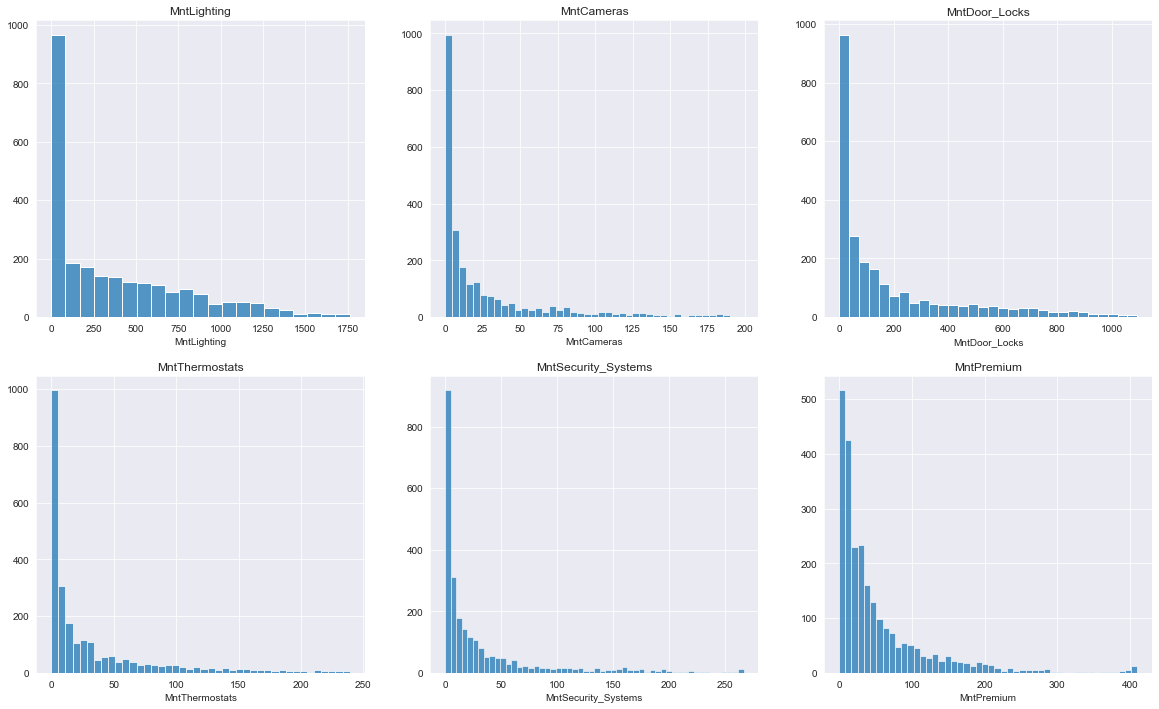

In [340]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df, x='MntLighting', ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df, x='MntCameras', ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df, x='MntDoor_Locks', ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df, x='MntThermostats', ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df, x='MntSecurity_Systems', ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df, x='MntPremium', ax=axes[1][2]).set(ylabel=None);

axes[0][0].set(title='MntLighting');
axes[0][1].set(title='MntCameras');
axes[0][2].set(title='MntDoor_Locks');
axes[1][0].set(title='MntThermostats');
axes[1][1].set(title='MntSecurity_Systems');
axes[1][2].set(title='MntPremium');

plt.show();

<h4>Monetary Spends on Products</h4>
<p>We can clearly see that all mnt columns have a negative distribution that will later affect also the Total spends of the users. To solve such high distribution, we will apply a logoritm scale to all mnt values</p>

In [341]:
df["logLighting"] = np.where(df["MntLighting"] == 0, df["MntLighting"], np.log(df["MntLighting"]))
df["logCameras"] = np.where(df["MntCameras"] == 0, df["MntCameras"], np.log(df["MntCameras"]))
df["logDoor_Locks"] = np.where(df["MntDoor_Locks"] == 0, df["MntDoor_Locks"], np.log(df["MntDoor_Locks"]))
df["logThermostats"] = np.where(df["MntThermostats"] == 0, df["MntThermostats"], np.log(df["MntThermostats"]))
df["logSecurity_Systems"] = np.where(df["MntSecurity_Systems"] == 0, df["MntSecurity_Systems"], np.log(df["MntSecurity_Systems"]))
df["logPremium"] = np.where(df["MntPremium"] == 0, df["MntPremium"], np.log(df["MntPremium"]))

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


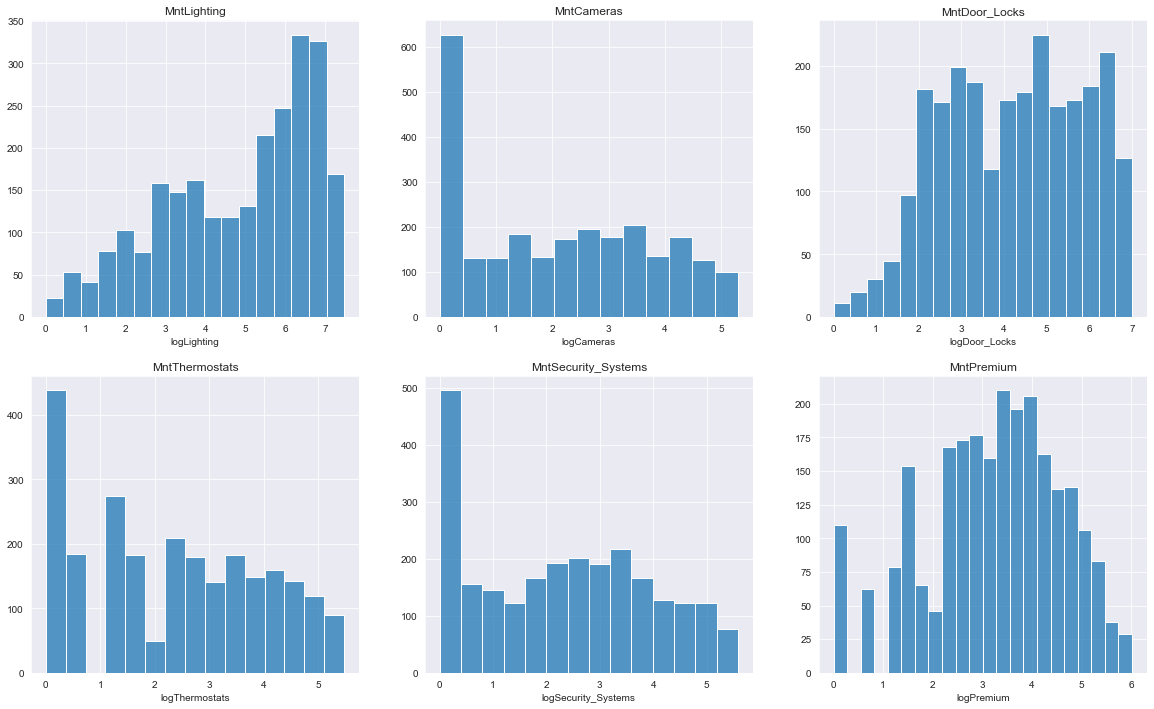

In [342]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df, x='logLighting', ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df, x='logCameras', ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df, x='logDoor_Locks', ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df, x='logThermostats', ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df, x='logSecurity_Systems', ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df, x='logPremium', ax=axes[1][2]).set(ylabel=None);


axes[0][0].set(title='MntLighting');
axes[0][1].set(title='MntCameras');
axes[0][2].set(title='MntDoor_Locks');
axes[1][0].set(title='MntThermostats');
axes[1][1].set(title='MntSecurity_Systems');
axes[1][2].set(title='MntPremium');

plt.show();

<h3>Income, Age and Number of Website Monthly Visits Analysis</h3>

In [343]:
#Creating a column with the sum of the Mnt Values
df["MntTotal"] = df["MntLighting"] + df["MntCameras"] + df["MntDoor_Locks"] + df["MntThermostats"] + df["MntSecurity_Systems"] + df["MntPremium"]
df["logTotal"] = df["logLighting"] + df["logCameras"] + df["logDoor_Locks"] + df["logThermostats"] + df["logSecurity_Systems"] + df["logPremium"]

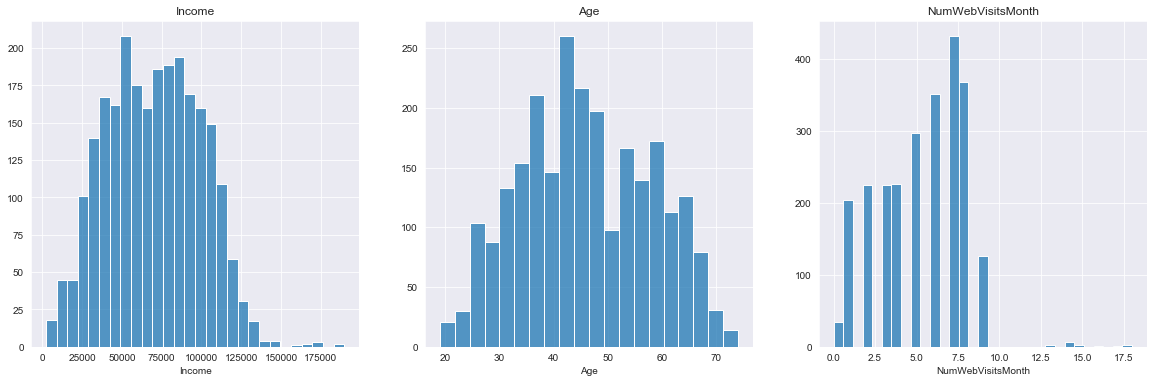

In [344]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.histplot(data=df, x='Income', ax=ax[0]).set(ylabel=None);
sns.histplot(data=df, x='Age', ax=ax[1]).set(ylabel=None);
sns.histplot(data=df, x='NumWebVisitsMonth', ax=ax[2]).set(ylabel=None);

ax[0].set(title='Income');
ax[1].set(title='Age');
ax[2].set(title='NumWebVisitsMonth');

plt.show()

<h4>Outcomes</h4>
<ul>
<li><b>Income: </b>we will remove all records with icnome above 150.000 yearly.</li>
<li><b>Age: </b>to avoid binning to many columns, we will leave age as it is</li>
<li><b>Number of Monthly Web Visists: </b>we will bin the values in four diffenrent columns</li>
</ul>

In [345]:
#Dealing with outliers from the income column

incomeCap = 150000

outliers = df[df["Income"] > incomeCap].shape[0] / df.shape[0]
print('The outlier removal would keep:', round((1 - outliers),4), 'of the dataset')
print('The removal will delete ', df[df["Income"] > incomeCap].shape[0], ' records')

The outlier removal would keep: 0.9968 of the dataset
The removal will delete  8  records


In [346]:
#Creating a clean df without outliers and saving as df_prep
df_prep = df.copy(deep=True)

df_prep = df[df["Income"] < incomeCap]

In [347]:
df_prep['binnedWebVisitsMonth'] = pd.qcut(df_prep['NumWebVisitsMonth'], q=4)

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


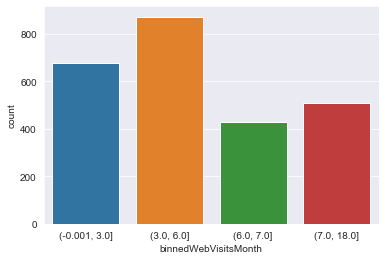

In [348]:
sns.countplot(data=df_prep, x='binnedWebVisitsMonth')

<h3>Analysis of Purchase Habits</h3>

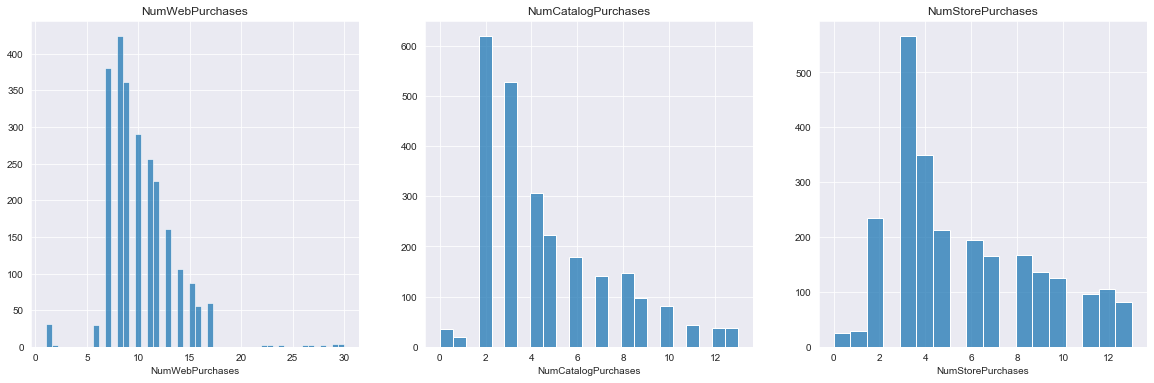

In [349]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.histplot(data=df_prep, x='NumWebPurchases', ax=ax[0]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumCatalogPurchases', ax=ax[1]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumStorePurchases', ax=ax[2]).set(ylabel=None);

ax[0].set(title='NumWebPurchases');
ax[1].set(title='NumCatalogPurchases');
ax[2].set(title='NumStorePurchases');

plt.show()

<h4>Outcomes</h4>
<li><b>Web Purchases: </b>will be binned in <b>4</b> columns</li>
<li><b>Catalog Purchases: </b>will be binned in <b>3</b> columns</li>
<li><b>Web Purchases: </b>will be binned in <b>3</b> columns</li>
</ul>

In [350]:
df_prep['binnedWebPurchases'] = pd.qcut(df_prep['NumWebPurchases'], q=4)
df_prep['binnedCatalogPurchases'] = pd.qcut(df_prep['NumCatalogPurchases'], q=3)
df_prep['binnedStorePurchases'] = pd.qcut(df_prep['NumStorePurchases'], q=3)

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


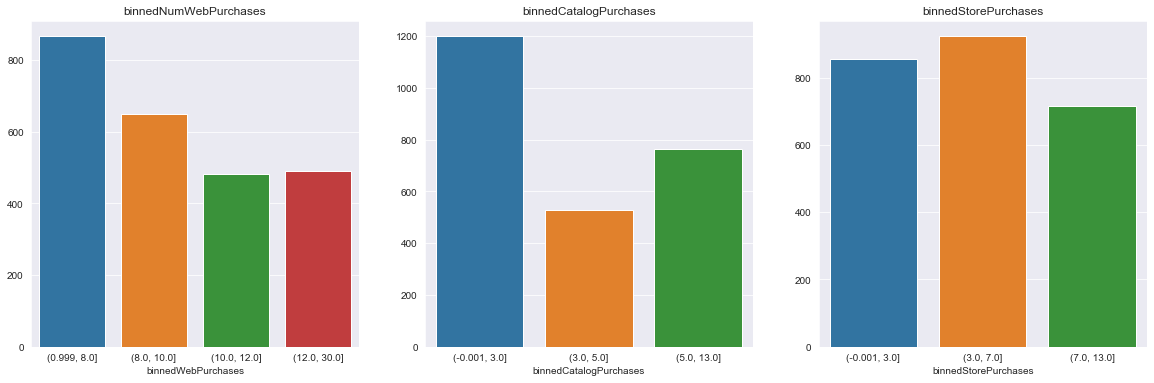

In [351]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.countplot(data=df_prep, x='binnedWebPurchases', ax=ax[0]).set(ylabel=None);
sns.countplot(data=df_prep, x='binnedCatalogPurchases', ax=ax[1]).set(ylabel=None);
sns.countplot(data=df_prep, x='binnedStorePurchases', ax=ax[2]).set(ylabel=None);

ax[0].set(title='binnedNumWebPurchases');
ax[1].set(title='binnedCatalogPurchases');
ax[2].set(title='binnedStorePurchases');

plt.show()

In [352]:
df_prep.shape

(2492, 41)

In [353]:
colsDrop = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal', 'MntLighting', 'MntCameras', 'MntDoor_Locks', 'MntThermostats', 'MntSecurity_Systems', 'MntPremium', 'Kidhome', 'Teenhome']

df_prep.drop(colsDrop, axis=1, inplace=True)

df_prep.shape

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2492, 28)

In [354]:
df_prep

,Education,Marital_Status,Income,Recency,NumDealsPurchases,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,logCameras,logDoor_Locks,logThermostats,logSecurity_Systems,logPremium,logTotal,binnedWebVisitsMonth,binnedWebPurchases,binnedCatalogPurchases,binnedStorePurchases
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,Master,Divorced,75436.0,32,1,0,0,0,0,0,...,2.944439,5.187386,2.397895,1.609438,2.397895,20.403521,"(-0.001, 3.0]","(8.0, 10.0]","(3.0, 5.0]","(7.0, 13.0]"
350001148,PhD,Single,37029.0,30,1,0,0,0,0,0,...,1.945910,2.772589,0.000000,1.791759,2.197225,10.499242,"(3.0, 6.0]","(0.999, 8.0]","(-0.001, 3.0]","(-0.001, 3.0]"
350001150,Graduation,Single,112765.0,72,1,0,0,0,0,0,...,2.995732,6.665684,3.555348,4.158883,5.278115,28.795799,"(3.0, 6.0]","(12.0, 30.0]","(5.0, 13.0]","(7.0, 13.0]"
350001155,PhD,Divorced,50518.0,42,3,0,0,0,0,0,...,1.609438,3.367296,1.609438,1.386294,2.833213,13.444737,"(3.0, 6.0]","(0.999, 8.0]","(-0.001, 3.0]","(3.0, 7.0]"
350001156,PhD,Together,41238.0,59,4,1,0,0,0,0,...,2.484907,4.330733,2.397895,2.708050,5.003946,22.422700,"(7.0, 18.0]","(10.0, 12.0]","(3.0, 5.0]","(-0.001, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350011108,Graduation,Single,12962.0,7,4,0,0,0,0,0,...,2.833213,2.890372,1.609438,2.995732,3.931826,16.340022,"(7.0, 18.0]","(8.0, 10.0]","(-0.001, 3.0]","(-0.001, 3.0]"
350011109,PhD,Married,92837.0,79,1,0,0,0,0,0,...,3.044522,5.303305,4.158883,4.624973,3.663562,27.570611,"(3.0, 6.0]","(8.0, 10.0]","(3.0, 5.0]","(7.0, 13.0]"
350011110,PhD,Married,62675.0,73,5,0,0,0,0,0,...,0.000000,2.564949,0.000000,0.000000,0.693147,8.590815,"(7.0, 18.0]","(10.0, 12.0]","(-0.001, 3.0]","(3.0, 7.0]"


In [355]:
df_prep.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,2492,4,PhD,1355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2492,5,Married,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2492,NaN,NaN,NaN,69576.9,29093,2268,47376.2,69974,92603,149126
Recency,2492,NaN,NaN,NaN,49.9057,28.7139,0,25,51,74,99
NumDealsPurchases,2492,NaN,NaN,NaN,2.21027,1.79899,0,1,2,3,13
AcceptedCmp2,2492,NaN,NaN,NaN,0.0882825,0.283762,0,0,0,0,1
AcceptedCmp3,2492,NaN,NaN,NaN,0.0726324,0.259584,0,0,0,0,1
AcceptedCmp4,2492,NaN,NaN,NaN,0.0858748,0.280235,0,0,0,0,1
AcceptedCmp5,2492,NaN,NaN,NaN,0.0670144,0.250097,0,0,0,0,1
AcceptedCmp1,2492,NaN,NaN,NaN,0.0120385,0.10908,0,0,0,0,1


In [356]:
df_prep.corr()

,Income,Recency,NumDealsPurchases,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Z_CostContact,...,Age,DaysAsCustomer,Children,logLighting,logCameras,logDoor_Locks,logThermostats,logSecurity_Systems,logPremium,logTotal
Income,1.000000,-0.006481,-0.130856,-0.028761,0.207660,0.422361,0.321354,0.108512,-0.025359,NaN,...,0.186300,-0.031635,-0.397747,0.786820,0.548557,0.775316,0.546129,0.529330,0.385678,0.744352
Recency,-0.006481,1.000000,-0.017180,0.004865,0.021493,0.017271,0.004793,0.024331,-0.003540,NaN,...,-0.002439,0.028036,-0.015978,0.002048,-0.033077,0.003649,-0.011314,-0.012580,0.019140,-0.007270
NumDealsPurchases,-0.130856,-0.017180,1.000000,0.062707,0.046370,-0.218183,-0.127695,0.017781,0.020454,NaN,...,0.099958,0.243246,0.486970,0.168388,-0.071049,0.037621,-0.084845,-0.083048,0.100971,0.015040
AcceptedCmp2,-0.028761,0.004865,0.062707,1.000000,-0.087086,0.056075,0.058020,0.043468,0.041728,NaN,...,-0.017428,0.012435,0.026476,0.018453,-0.031937,0.002715,-0.024902,-0.057677,0.152657,0.007630
AcceptedCmp3,0.207660,0.021493,0.046370,-0.087086,1.000000,0.228781,0.190889,0.210127,-0.011766,NaN,...,0.053652,0.001270,-0.095323,0.254966,0.028679,0.155175,0.053900,0.038993,0.071252,0.128598
AcceptedCmp4,0.422361,0.017271,-0.218183,0.056075,0.228781,1.000000,0.387543,0.163160,-0.015560,NaN,...,0.066101,-0.009284,-0.338496,0.304892,0.267567,0.346896,0.269109,0.245251,0.155144,0.330437
AcceptedCmp5,0.321354,0.004793,-0.127695,0.058020,0.190889,0.387543,1.000000,0.191147,-0.026429,NaN,...,-0.032472,0.019679,-0.267877,0.254437,0.209014,0.285205,0.205878,0.200896,0.128147,0.267050
AcceptedCmp1,0.108512,0.024331,0.017781,0.043468,0.210127,0.163160,0.191147,1.000000,-0.010886,NaN,...,0.004335,0.025269,-0.034316,0.105921,0.014853,0.071216,0.004624,0.003226,0.035531,0.050064
Complain,-0.025359,-0.003540,0.020454,0.041728,-0.011766,-0.015560,-0.026429,-0.010886,1.000000,NaN,...,-0.005424,-0.003973,0.053797,-0.038254,-0.052577,-0.035512,-0.048175,-0.034591,-0.005740,-0.045170
Z_CostContact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


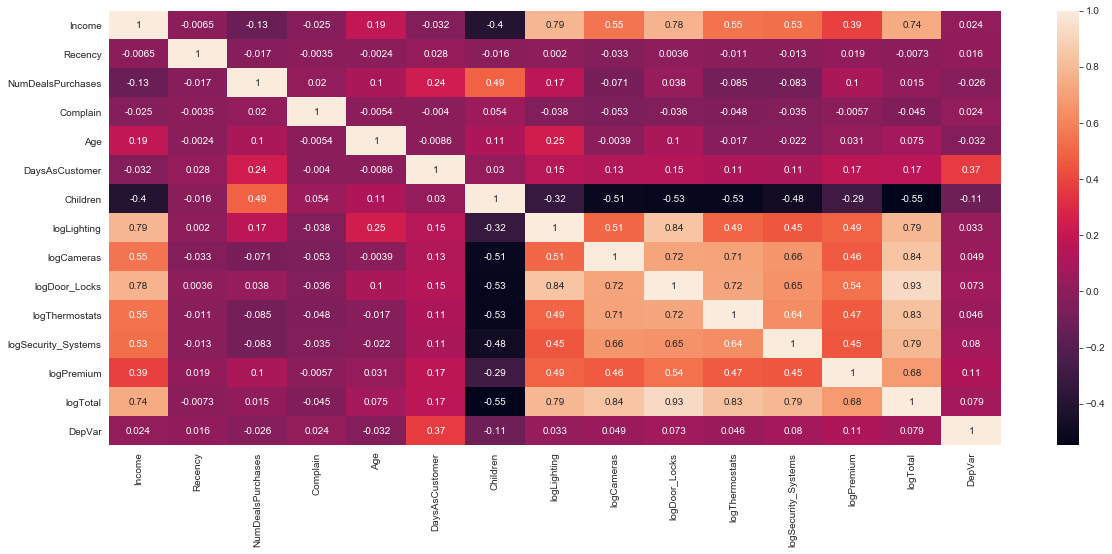

In [357]:

colsToCorr = ['Income', 'Recency', 'NumDealsPurchases', 'Complain', 'Age', 'DaysAsCustomer', 'Children', 'logLighting', 'logCameras', 'logDoor_Locks', 'logThermostats', 'logSecurity_Systems', 'logPremium', 'logTotal', 'DepVar']

plt.figure(figsize=(20,8))
sns.heatmap(df_prep[colsToCorr].corr(), annot=True)
plt.show()

<h1>IV. Data Exploration</h1>

<h1>V. Data Normalization</h1>

<h1>VI. Data Modeling</h1>

In [358]:
df_prep.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,2492,4,PhD,1355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2492,5,Married,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2492,NaN,NaN,NaN,69576.9,29093,2268,47376.2,69974,92603,149126
Recency,2492,NaN,NaN,NaN,49.9057,28.7139,0,25,51,74,99
NumDealsPurchases,2492,NaN,NaN,NaN,2.21027,1.79899,0,1,2,3,13
AcceptedCmp2,2492,NaN,NaN,NaN,0.0882825,0.283762,0,0,0,0,1
AcceptedCmp3,2492,NaN,NaN,NaN,0.0726324,0.259584,0,0,0,0,1
AcceptedCmp4,2492,NaN,NaN,NaN,0.0858748,0.280235,0,0,0,0,1
AcceptedCmp5,2492,NaN,NaN,NaN,0.0670144,0.250097,0,0,0,0,1
AcceptedCmp1,2492,NaN,NaN,NaN,0.0120385,0.10908,0,0,0,0,1


In [359]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn import tree

In [360]:
X = df_prep.copy(deep=True)

y = X["DepVar"]

In [361]:
# Identifying the columns that should not participate in the model
colsToDrop = ["Z_CostContact", "Z_Revenue", "DepVar"]
# Enconding the columns that are strings or categorical
colsToEncode = ["Education", "Marital_Status", "binnedWebVisitsMonth", "binnedWebPurchases", "binnedCatalogPurchases", "binnedStorePurchases"]
dummies = pd.get_dummies(X[colsToEncode])
X = pd.concat([X, dummies], axis=1)

#Deleting the columns not interested for the model and the previous enconding ones.
X = X.drop(columns=colsToDrop)
X = X.drop(columns=colsToEncode)

In [362]:
X.head()

,Income,Recency,NumDealsPurchases,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Age,...,"binnedWebPurchases_(0.999, 8.0]","binnedWebPurchases_(8.0, 10.0]","binnedWebPurchases_(10.0, 12.0]","binnedWebPurchases_(12.0, 30.0]","binnedCatalogPurchases_(-0.001, 3.0]","binnedCatalogPurchases_(3.0, 5.0]","binnedCatalogPurchases_(5.0, 13.0]","binnedStorePurchases_(-0.001, 3.0]","binnedStorePurchases_(3.0, 7.0]","binnedStorePurchases_(7.0, 13.0]"
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,75436.0,32,1,0,0,0,0,0,0,46,...,0,1,0,0,0,1,0,0,0,1
350001148,37029.0,30,1,0,0,0,0,0,0,28,...,1,0,0,0,1,0,0,1,0,0
350001150,112765.0,72,1,0,0,0,0,0,0,57,...,0,0,0,1,0,0,1,0,0,1
350001155,50518.0,42,3,0,0,0,0,0,0,45,...,1,0,0,0,1,0,0,0,1,0
350001156,41238.0,59,4,1,0,0,0,0,0,43,...,0,0,1,0,0,1,0,1,0,0


In [363]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 350001144 to 350011119
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Income                                2492 non-null   float64
 1   Recency                               2492 non-null   int64  
 2   NumDealsPurchases                     2492 non-null   int64  
 3   AcceptedCmp2                          2492 non-null   int64  
 4   AcceptedCmp3                          2492 non-null   int64  
 5   AcceptedCmp4                          2492 non-null   int64  
 6   AcceptedCmp5                          2492 non-null   int64  
 7   AcceptedCmp1                          2492 non-null   int64  
 8   Complain                              2492 non-null   int64  
 9   Age                                   2492 non-null   int64  
 10  DaysAsCustomer                        2492 non-null   int64  
 11  Chil

In [364]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 123)

In [380]:
y_pred = [1] * len(y_test)

In [366]:
# Create and train the model
dt_regr = tree.DecisionTreeClassifier(random_state=123, max_depth=4, min_samples_leaf=5)
dt_regr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [381]:
model = dt_regr.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 42 and input n_features is 43 

In [367]:
def print_classification(y_test, y_pred):
    from sklearn.metrics import classification_report, confusion_matrix
    # Classification Report
    print(classification_report(y_test, y_pred))
    
    # Plot
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (5,3))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

In [368]:
# Explore feature importance (Gini importance - normalized)
formattedList = [float(format(member,'.6f')) for member in dt_regr.feature_importances_]
formattedList2 = [abs(float(format(member,'.6f'))) for member in dt_regr.feature_importances_]
data_tuples = list(zip(X_test.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df.reset_index(drop=True, inplace=True)
coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)
coeff_df

,Feature,Coefficient,AbsCoefficient
10,DaysAsCustomer,0.434977,0.434977
6,AcceptedCmp5,0.148605,0.148605
3,AcceptedCmp2,0.131057,0.131057
12,logLighting,0.089602,0.089602
5,AcceptedCmp4,0.072721,0.072721
41,"binnedStorePurchases_(7.0, 13.0]",0.054765,0.054765
33,"binnedWebPurchases_(8.0, 10.0]",0.028788,0.028788
1,Recency,0.017769,0.017769
19,Education_2n Cycle,0.011969,0.011969
0,Income,0.009748,0.009748


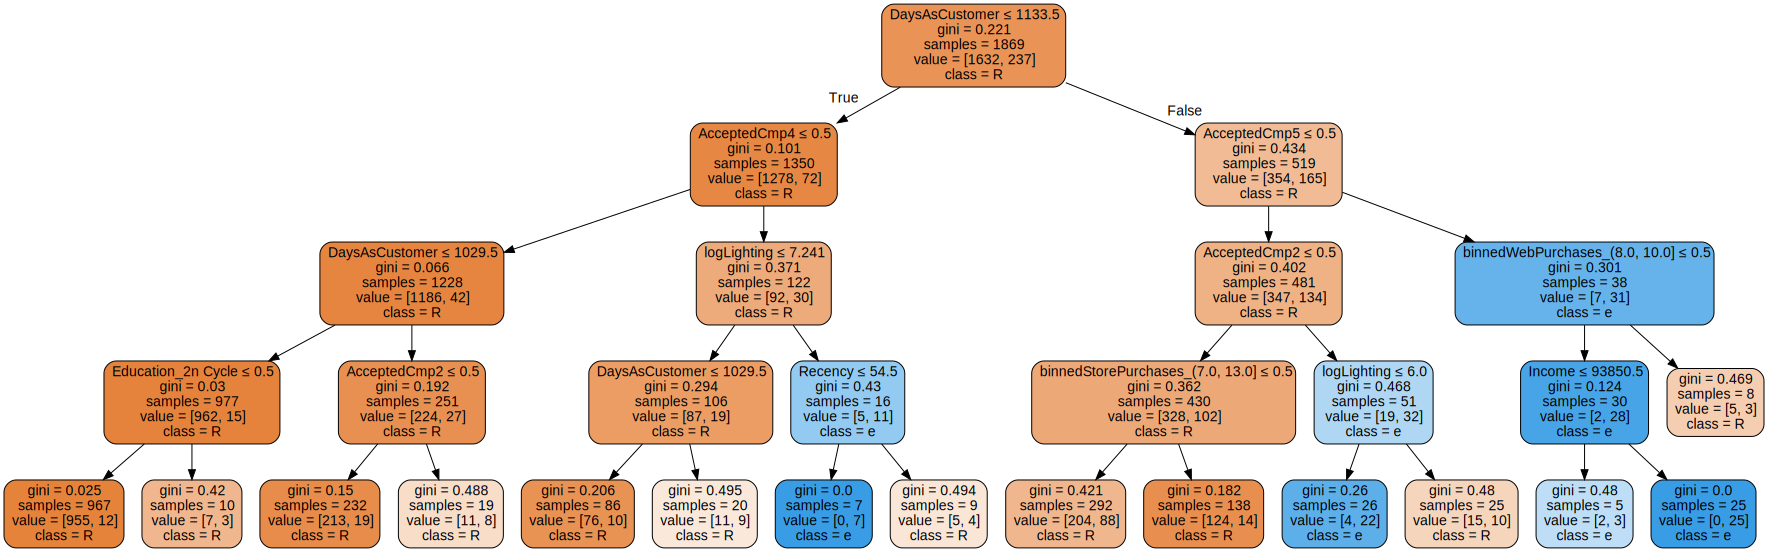

In [369]:
dot_data = tree.export_graphviz(dt_regr, 
                  feature_names=list(X_train.columns),  
                  class_names='Returns',  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [370]:
# predict y for X_train and X_test
y_pred_train = dt_regr.predict(X_train) 
y_pred_test = dt_regr.predict(X_test) 

In [371]:
# Function to calculate MAPE metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [372]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [373]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

ipykernel_launcher:4: RuntimeWarning: divide by zero encountered in true_divide
ipykernel_launcher:4: RuntimeWarning: invalid value encountered in true_divide
ipykernel_launcher:4: RuntimeWarning: divide by zero encountered in true_divide
ipykernel_launcher:4: RuntimeWarning: invalid value encountered in true_divide


,Measure,Train,Test
0,MAE,0.099518,0.110754
1,RMSE,0.315465,0.332798
2,R^2,0.101219,0.030995
3,MAPE (%),NaN,NaN
4,MAX Error,1.000000,1.000000


In [377]:
X_test["Prediction"]

Custid
350010329    0
350010913    0
350001309    0
350003109    0
350009887    0
            ..
350007675    0
350006661    0
350004428    0
350001940    0
350008684    0
Name: Prediction, Length: 623, dtype: int64